## Volatility for Returns of SNT against underlying Assets


Instructions for adding a new comparable asset:
1. Load data in Dataset Import Cell
2. Add Name to tickers and df_names **ORDER MUST MATCH**

Instructions for new length of analysis:
1. Change Start to desired start time
2. Change End to desired end time.

*Be aware of varying lengths of history for comparable assets for competeness of analysis. However, index created is for every between specified start and end dates*

In [1]:
# Standard Library Imports
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from tabulate import tabulate
from scipy import stats
sns.set_style('whitegrid')
import datetime as dt

%matplotlib inline

In [2]:
# import quandl
# quandl.ApiConfig.api_key = 'BzJzsU5Cxxc3BPJteJdu'
# T_bill  = quandl.get('EOD/BIL')

### Comparison to Other Currencies and Stock Market Indices
#### Dataset Import

In [3]:
# 3 year cryptcompare
btc_usd = pd.read_csv('data\BTC_USD.csv')
eth_usd = pd.read_csv('data\ETH_USD.csv')
eth_btc = pd.read_csv('data\ETH_BTC.csv')
snt_btc = pd.read_csv('data\SNT_BTC.csv')
snt_eth = pd.read_csv('data\SNT_ETH.csv')
snt_usd = pd.read_csv('data\SNT_USD.csv')

In [4]:
snt_usd.head()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,ts,timeDate
0,1496534400000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496534400,2017-06-03
1,1496620800000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496620800,2017-06-04
2,1496707200000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496707200,2017-06-05
3,1496793600000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496793600,2017-06-06
4,1496880000000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496880000,2017-06-07


### ADD EVERY TICKER NAME HERE!

In [5]:
# order in both lists MUST MATCH
tickers=[ 'btc_usd','eth_usd', 'eth_btc','snt_btc','snt_eth', 'snt_usd'] 
df_names = [btc_usd, eth_usd,   eth_btc,  snt_btc, snt_eth, snt_usd]

### Set START DATE AND END DATE OF ANALYSIS

In [6]:

# Y , M , D
start = dt.datetime(2017, 12, 1)


#Enter a specific date or today
end = dt.datetime(2020, 6, 3)

#end = dt.date.today()
print(start)

2017-12-01 00:00:00


Make a dataframe starts and ends at Time specified, date as index, and columns the close price of assets in question

In [7]:
df=pd.DataFrame()

df['timeDate'] = pd.to_datetime([start + dt.timedelta(days=x) for x in range(0, (end-start).days)], format = '%Y/%m/%d')

# df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
# df = df[df.Date  >= start ]
df = df.set_index('timeDate')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('timeDate').close.rename(tickers[count]))


In [8]:
df.head()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2017-12-01,10890.40,457.96,0.04190,0.000007,0.000164,0.05114
2017-12-02,11169.13,462.81,0.04119,0.000007,0.000160,0.11990
2017-12-03,11578.32,466.93,0.04021,0.000007,0.000162,0.08000
2017-12-04,11699.44,453.96,0.03888,0.000006,0.000160,0.08299
2017-12-05,13568.20,422.48,0.03051,0.000005,0.000157,0.07800


### Daily Percent Change
#### daily_df is a dataframe of daily returns

In [9]:
daily_df=pd.DataFrame(df.index, copy =True)
daily_df = daily_df.set_index('timeDate')
for count, name in enumerate(tickers):
#     daily_df[name] = df[name].dropna().pct_change(fill_method='ffill')
    daily_df = daily_df.join(df[name].dropna().pct_change(fill_method='ffill'))
daily_df.head(12)

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-02,0.025594,0.010590,-0.016945,-0.043415,-0.023171,1.344544
2017-12-03,0.036636,0.008902,-0.023792,-0.004539,0.014357,-0.332777
2017-12-04,0.010461,-0.027777,-0.033076,-0.059271,-0.014154,0.037375
2017-12-05,0.159731,-0.069345,-0.215278,-0.226171,-0.021848,-0.060128
2017-12-06,0.223080,-0.003148,-0.186496,-0.327766,-0.160179,-0.192308
2017-12-07,-0.043090,0.072634,0.120467,0.229814,0.054711,-0.046825
2017-12-08,-0.077081,0.046753,0.129809,-0.002525,-0.088617,-0.145545
2017-12-09,0.016769,-0.076915,-0.082750,-0.124051,-0.052174,0.169363


#### Daily Returns Sampled Weekly

In [10]:
#returns = df.resample('W').diff()
# returns = returns.resample('W').dropna().pct_change(fill_method='ffill')
#returns = returns.resample('W').apply(lambda x: diff()/x )

# WEEKLY MEAN
# returns = df.groupby(pd.Grouper(freq='W')).mean()
# returns = daily_df.groupby(pd.Grouper(freq='W'))
# returns = returns.pct_change(fill_method='ffill')

In [11]:
#returns = df.resample('W').diff()
# returns = returns.resample('W').dropna().pct_change(fill_method='ffill')
#returns = returns.resample('W').apply(lambda x: diff()/x )

# WEEKLY LAST CLOSE
#returns = df.groupby(pd.Grouper(freq='W')).mean()
returns = daily_df.groupby(pd.Grouper(freq='W')).last()
#returns = returns.pct_change(fill_method='ffill')

In [12]:
returns.head(12)

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2017-12-03,0.036636,0.008902,-0.023792,-0.004539,0.014357,-0.332777
2017-12-10,0.111815,0.175949,0.068702,0.092486,0.025021,0.150000
2017-12-17,-0.002311,0.095136,0.109538,0.104460,-0.011984,0.174912
2017-12-24,0.014764,0.069876,0.070402,0.011952,-0.058224,0.275362
2017-12-31,-0.024738,0.020334,0.052317,0.180136,0.129506,0.437656
2018-01-07,-0.077235,0.016426,0.097840,-0.047149,-0.128590,0.000000
2018-01-14,-0.000350,-0.059427,-0.056570,-0.033417,0.020440,0.046279
2018-01-21,-0.066617,-0.047136,0.013061,0.015421,-0.005386,-0.051210
2018-01-28,-0.052941,-0.050033,-0.006654,-0.021705,-0.007923,-0.076949


### Bollinger Band Comparison

In [13]:
for count, name in enumerate(tickers):
    print(count, name)

0 btc_usd
1 eth_usd
2 eth_btc
3 snt_btc
4 snt_eth
5 snt_usd


In [14]:
rolling_std = pd.DataFrame(df.index, copy =True)
rolling_std = rolling_std.set_index('timeDate')

rolling_mean = pd.DataFrame(df.index, copy =True)
rolling_mean = rolling_mean.set_index('timeDate')

for count, name in enumerate(tickers):
    rolling_std = rolling_std.join(df[name].dropna().rolling(window = 21).std().T.squeeze())
    rolling_mean = rolling_mean.join(df[name].dropna().rolling(window = 21).mean().T.squeeze())

rolling_mean.iloc[45:50]

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2018-01-15,14360.700000,1017.803810,0.070982,0.000026,0.000365,0.398186
2018-01-16,14148.897619,1031.363333,0.073056,0.000027,0.000370,0.407443
2018-01-17,13995.630476,1045.471905,0.074990,0.000028,0.000375,0.414257
2018-01-18,13857.148095,1059.650952,0.076849,0.000029,0.000380,0.421648
2018-01-19,13877.453333,1081.437143,0.078517,0.000029,0.000383,0.430362


In [15]:
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

### TIME SERIES VISUALIZATION

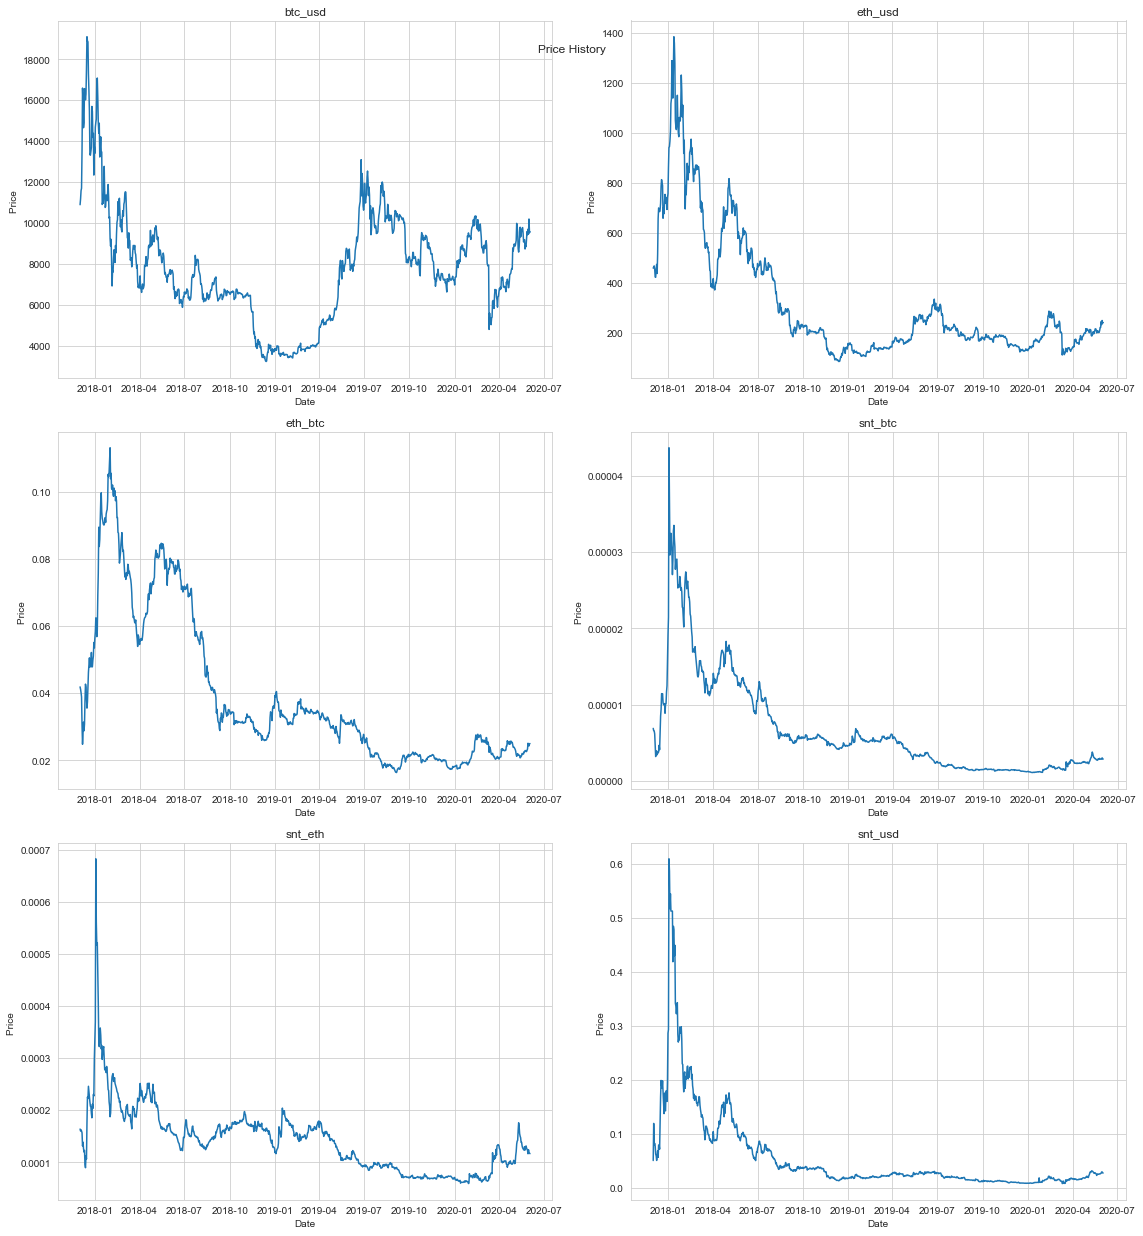

In [16]:
plt.figure(figsize=(16,34))
plt.suptitle('Price History')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price ')

plt.tight_layout()

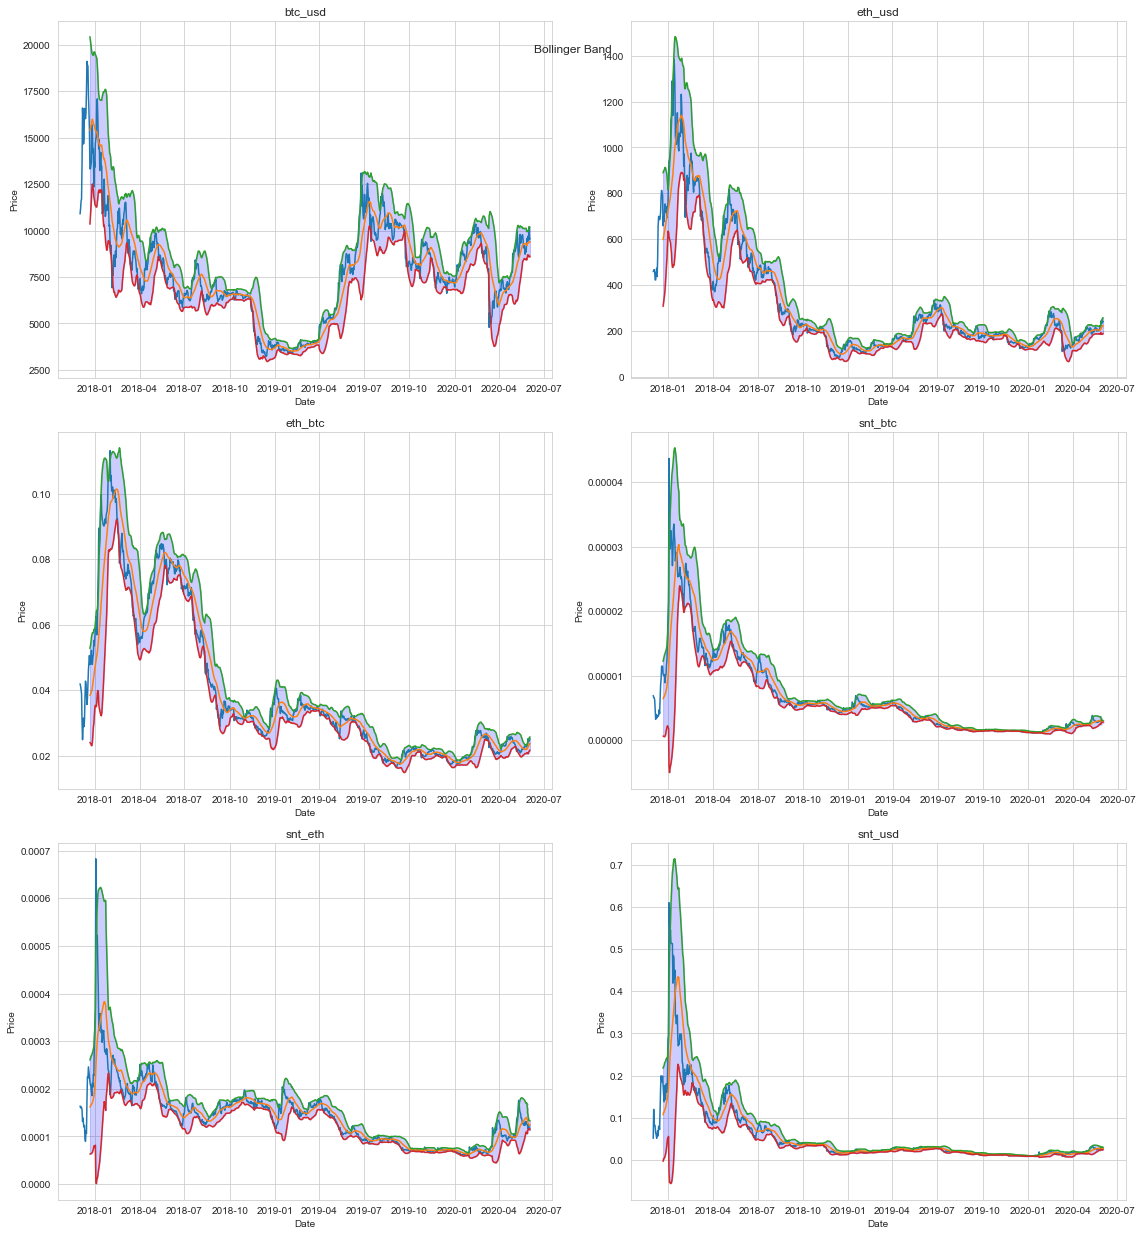

In [17]:
plt.figure(figsize=(16,34))
for count, name in enumerate(df_names):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[tickers[count]])
    plt.plot(middle_band.index, middle_band[tickers[count]]) # name.Close)
    plt.plot(upper_band.index, upper_band[tickers[count]]) # name.Close)
    plt.plot(lower_band.index, lower_band[tickers[count]]) # name.Close)
    plt.fill_between(rolling_std.index, lower_band[tickers[count]], upper_band[tickers[count]], color='b', alpha=0.2)
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price')
plt.suptitle('Bollinger Band')
plt.tight_layout()

### Correlation

In [18]:
corr_df=returns.corr()
corr_df

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,1.000000,0.807969,0.042839,0.092920,-0.048525,0.429492
eth_usd,0.807969,1.000000,0.618443,0.341006,-0.220468,0.585060
eth_btc,0.042839,0.618443,1.000000,0.462514,-0.304709,0.446299
snt_btc,0.092920,0.341006,0.462514,1.000000,0.616745,0.596947
snt_eth,-0.048525,-0.220468,-0.304709,0.616745,1.000000,0.281547
snt_usd,0.429492,0.585060,0.446299,0.596947,0.281547,1.000000


### Statistics Table

In [19]:
stat_table=pd.DataFrame(index=tickers)
# stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['Min']=stats.describe(returns.dropna())[1][0]
stat_table['Max']=stats.describe(returns.dropna())[1][1]
stat_table['Variance']=stats.describe(returns.dropna())[3]
stat_table['Std']=returns.dropna().std()
stat_table['Skewness']=stats.describe(returns.dropna())[4]
stat_table['Kurtosis']=stats.describe(returns.dropna())[5]
stat_table['z-value']=stats.kurtosistest(returns.dropna())[0]
stat_table['p-value']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,0.002901,-0.155219,0.119269,0.001905,0.043646,0.084593,1.368381,2.496414,1.254561e-02
eth_usd,0.000229,-0.165099,0.201148,0.003079,0.055491,0.286496,1.696743,2.825364,4.722687e-03
eth_btc,-0.002087,-0.099246,0.110161,0.001054,0.032463,0.647639,2.365682,3.375927,7.356737e-04
snt_btc,-0.003913,-0.101538,0.253968,0.002186,0.046750,1.913129,7.723244,5.511659,3.554668e-08
snt_eth,-0.002963,-0.128590,0.129506,0.001201,0.034654,0.608374,3.557372,4.100395,4.124449e-05
snt_usd,0.000080,-0.332777,0.437656,0.006662,0.081620,1.064054,7.654561,5.495736,3.890853e-08


In [20]:
returns.dropna().describe()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.002901,0.000229,-0.002087,-0.003913,-0.002963,0.000080
std,0.043646,0.055491,0.032463,0.046750,0.034654,0.081620
min,-0.155219,-0.165099,-0.099246,-0.101538,-0.128590,-0.332777
25%,-0.023352,-0.032719,-0.017482,-0.027906,-0.018960,-0.039240
50%,-0.002620,-0.004223,-0.004009,-0.006565,-0.005137,-0.005142
75%,0.024666,0.032729,0.009346,0.008646,0.011254,0.029155
max,0.119269,0.201148,0.110161,0.253968,0.129506,0.437656


### Covariance

In [21]:
cov_df=returns[1:].dropna().cov()
cov_df

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,0.001911,0.001970,0.000067,0.000191,-0.000078,0.001629
eth_usd,0.001970,0.003102,0.001124,0.000891,-0.000428,0.002693
eth_btc,0.000067,0.001124,0.001058,0.000707,-0.000343,0.001136
snt_btc,0.000191,0.000891,0.000707,0.002202,0.001007,0.002294
snt_eth,-0.000078,-0.000428,-0.000343,0.001007,0.001208,0.000847
snt_usd,0.001629,0.002693,0.001136,0.002294,0.000847,0.005854


#### Annualized Return Analysis

In [22]:
def calc_compound_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    growth = float(vf)/v0
    compound_return   = growth**(1./nYears) - 1
    compound_return = compound_return * 100
    return compound_return

def calc_simple_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    delta = float(vf) - v0
    simple_return   = delta / v0 /nYears
    simple_return = simple_return *100
    return simple_return

In [23]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#calculate compound_return
comp_return = [calc_compound_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#calculate simple_return
simp_return = [calc_simple_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#### Value Based, Final - Initial Return, Total Sample

In [24]:
for count, tick in enumerate(tickers):
    print(tick, ' Compounded Return = ', "%.2f" % comp_return[count], \
          '%,  Simple Return = ', "%.2f" % simp_return[count],'%')

btc_usd  Compounded Return =  -5.21 %,  Simple Return =  -5.73 %
eth_usd  Compounded Return =  -23.03 %,  Simple Return =  -36.97 %
eth_btc  Compounded Return =  -18.67 %,  Simple Return =  -27.08 %
snt_btc  Compounded Return =  -29.30 %,  Simple Return =  -55.22 %
snt_eth  Compounded Return =  -12.41 %,  Simple Return =  -15.71 %
snt_usd  Compounded Return =  -21.20 %,  Simple Return =  -32.59 %


In [25]:
# Dataframe with no NAs and 1 added to it
returns.ffill(inplace=True)
compound = returns[1:].apply(lambda x: x+1)

In [26]:
compound.head()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2017-12-10,1.111815,1.175949,1.068702,1.092486,1.025021,1.150000
2017-12-17,0.997689,1.095136,1.109538,1.104460,0.988016,1.174912
2017-12-24,1.014764,1.069876,1.070402,1.011952,0.941776,1.275362
2017-12-31,0.975262,1.020334,1.052317,1.180136,1.129506,1.437656
2018-01-07,0.922765,1.016426,1.097840,0.952851,0.871410,1.000000


#### Compound Annual Return From Daily Returns

In [27]:
compound_from_daily = (compound.prod() **(52/len(compound)) - 1) * 100 

In [28]:
for tick in tickers:
    compound_from_daily[tick] = (compound[tick].prod() **(52/len(compound[tick].dropna())) - 1) * 100 

In [29]:
compound_from_daily

btc_usd     9.215885
eth_usd    -6.876962
eth_btc   -11.938443
snt_btc   -22.746531
snt_eth   -17.490123
snt_usd    -0.388968
dtype: float64

#### Simple Annual Return from Daily Returns

In [30]:
simple_from_daily = returns[1:].sum() * 52 / len(returns[1:]) * 100
simple_from_daily

btc_usd    13.744894
eth_usd     0.847560
eth_btc    -9.992975
snt_btc   -20.324621
snt_eth   -16.097389
snt_usd    13.627375
dtype: float64

### DELTA OF RETURN ANALYSIS
Change in return from one time period to next

In [31]:
deltas = returns - returns.shift(periods =1)

In [32]:
delta_table=pd.DataFrame(index=tickers)
# delta_table.set_index(tickers)
delta_table['Mean']=stats.describe(deltas.dropna())[2]
delta_table['Min']=stats.describe(deltas.dropna())[1][0]
delta_table['Max']=stats.describe(deltas.dropna())[1][1]
delta_table['Variance']=stats.describe(deltas.dropna())[3]
delta_table['Std']=deltas.dropna().std()
delta_table['Skewness']=stats.describe(deltas.dropna())[4]
delta_table['Kurtosis']=stats.describe(deltas.dropna())[5]
delta_table['z-value']=stats.kurtosistest(deltas.dropna())[0]
delta_table['p-value']=stats.kurtosistest(deltas.dropna())[1]
delta_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,-0.000242,-0.146179,0.258147,0.003398,0.058296,0.766773,2.462341,3.436633,0.000589
eth_usd,-0.000011,-0.213305,0.226717,0.005373,0.073303,0.402192,0.719235,1.669138,0.095090
eth_btc,0.000200,-0.154410,0.134252,0.001779,0.042184,-0.567227,2.099897,3.165587,0.001548
snt_btc,0.000061,-0.264683,0.349510,0.004947,0.070336,0.346069,5.430547,4.862411,0.000001
snt_eth,-0.000174,-0.258096,0.187730,0.002965,0.054448,-0.505419,4.242050,4.410801,0.000010
snt_usd,0.002489,-0.437656,0.482777,0.010218,0.101086,0.340674,5.496620,4.884472,0.000001


In [33]:
deltas.dropna().describe()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,-0.000242,-0.000011,0.000200,0.000061,-0.000174,0.002489
std,0.058296,0.073303,0.042184,0.070336,0.054448,0.101086
min,-0.146179,-0.213305,-0.154410,-0.264683,-0.258096,-0.437656
25%,-0.034299,-0.047805,-0.021790,-0.031881,-0.026687,-0.048014
50%,-0.005894,-0.005381,0.003684,0.001210,0.002568,-0.003021
75%,0.026487,0.046037,0.023289,0.033550,0.027618,0.049682
max,0.258147,0.226717,0.134252,0.349510,0.187730,0.482777


### Covariance

In [34]:
delta_cov = deltas[1:].dropna().cov()
delta_cov

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,0.003398,0.003430,0.000031,0.000424,-0.000016,0.003433
eth_usd,0.003430,0.005373,0.001863,0.001604,-0.000760,0.004666
eth_btc,0.000031,0.001863,0.001779,0.001151,-0.000726,0.001200
snt_btc,0.000424,0.001604,0.001151,0.004947,0.002510,0.004577
snt_eth,-0.000016,-0.000760,-0.000726,0.002510,0.002965,0.002505
snt_usd,0.003433,0.004666,0.001200,0.004577,0.002505,0.010218


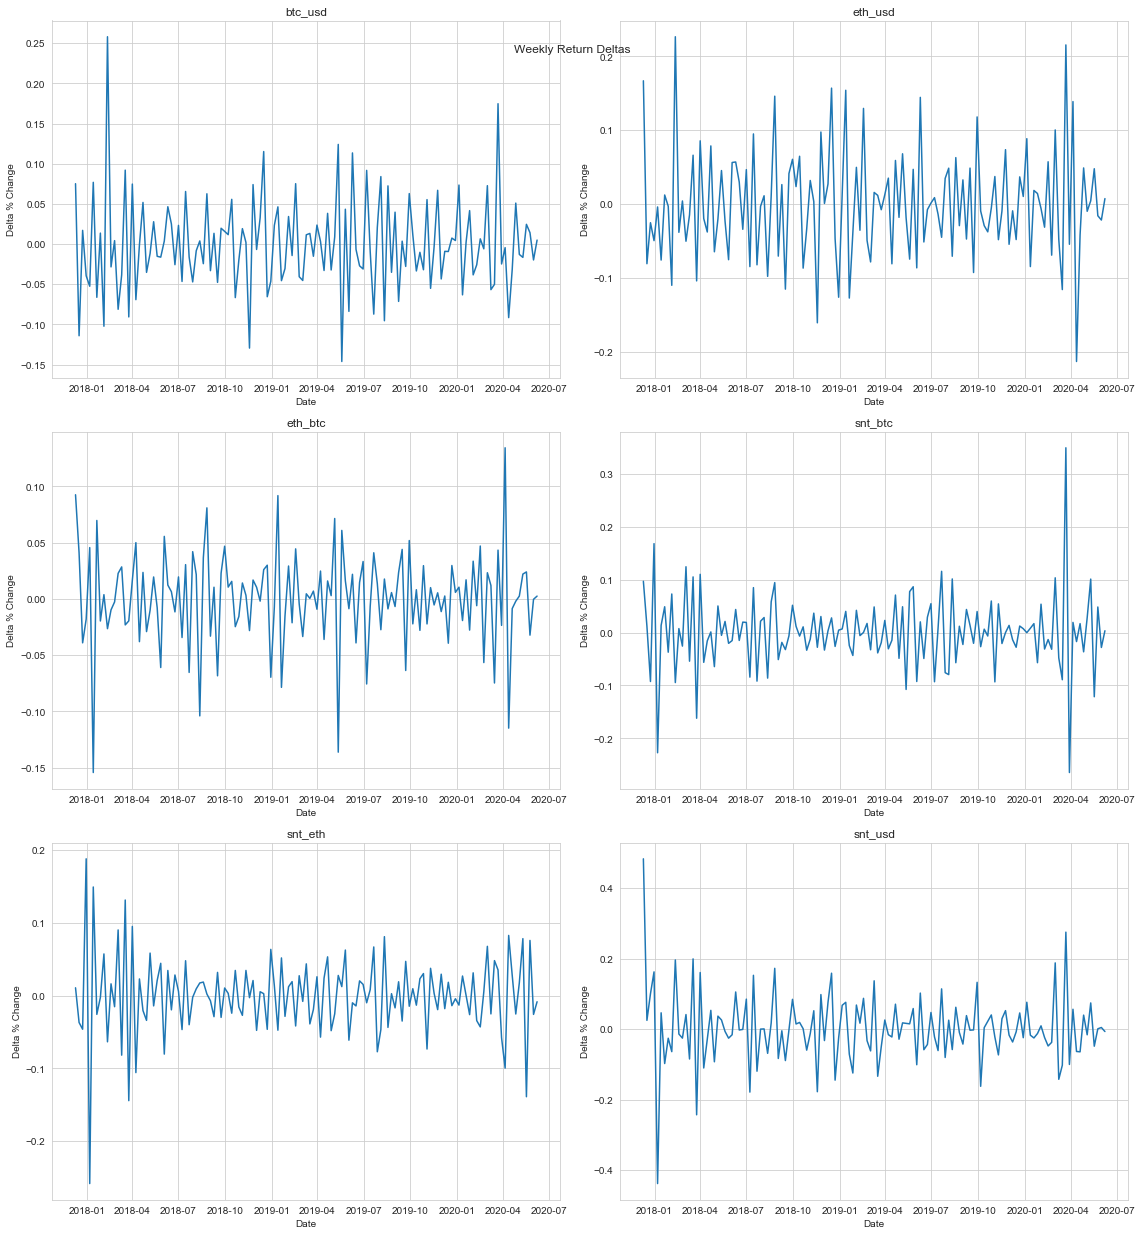

In [35]:
plt.figure(figsize=(16,34))
plt.suptitle('Weekly Return Deltas')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(deltas.index, deltas[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Delta % Change')

plt.tight_layout()

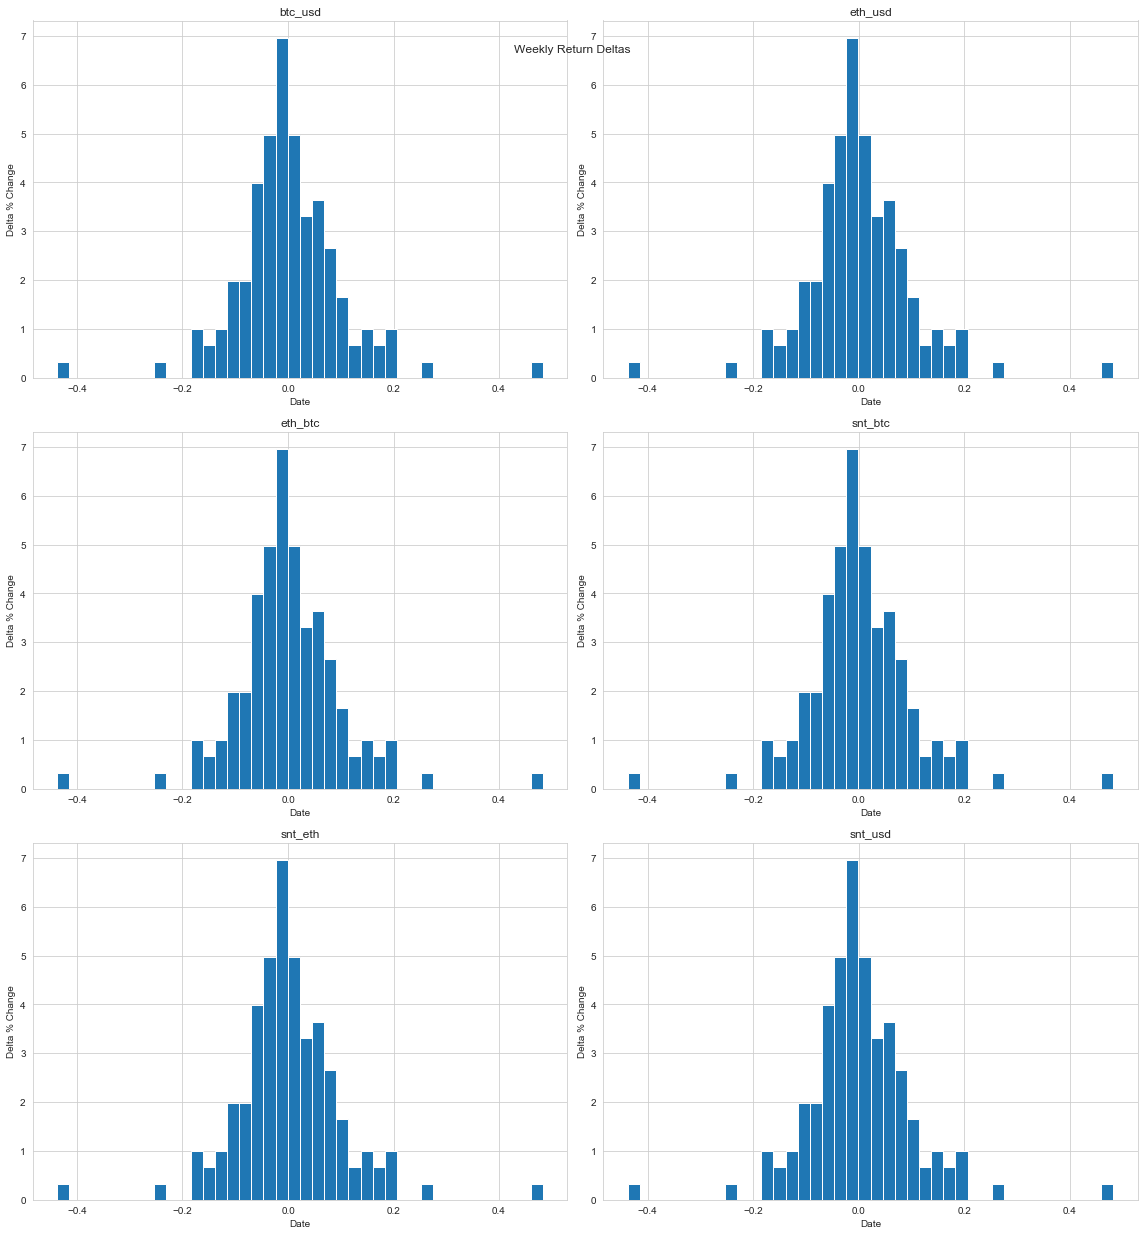

In [36]:
plt.figure(figsize=(16,34))
plt.suptitle('Weekly Return Deltas')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.hist(deltas[tick].dropna(),bins =40, density =True, label = 'Historical Data')
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Delta % Change')

plt.tight_layout()